In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [19]:
#4 x workers
df_pyspark = pd.read_csv('./results/pyspark_results.csv').drop(['ds_name', 'uniqie_pairs_sim_docs'], axis=1)
df_sequential = pd.read_csv('./results/sequential_results.csv').drop(['ds_name', 'uniqie_pairs_sim_docs'], axis=1)
#thresholds = [0.3, 0.5, 0.7, 0.8, 0.9]
thresholds = [0.3, 0.5, 0.7, 0.9]
workers = np.arange(1,16)
#sliceFactors = np.arange(1,6)
sliceFactors = [1,3,5]

In [6]:
df_pyspark = df_pyspark.drop(df_pyspark[(df_pyspark['threshold'] == 0.8) & (df_pyspark['slice_factor'] == 2) & (df_pyspark['slice_factor'] == 4)].index)

df_np_seq = df_sequential[df_sequential['type'] == 'numpy']
df_np_seq = df_np_seq.drop(df_np_seq[df_np_seq['threshold'] == 0.8].index).drop(['type'], axis=1)

df_cl_seq = df_sequential[df_sequential['type'] == 'classic']
df_cl_seq = df_cl_seq.drop(df_cl_seq[df_cl_seq['threshold'] == 0.8].index).drop(['type'], axis=1)

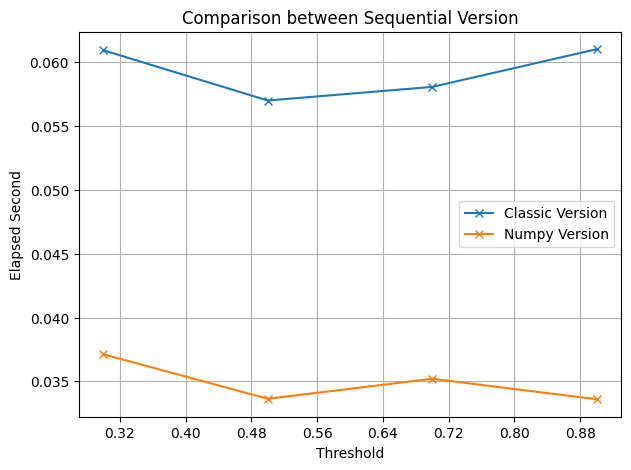

In [24]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(thresholds, df_cl_seq['elapsed'], label='Classic Version', marker='x')
ax.plot(thresholds, df_np_seq['elapsed'], label='Numpy Version', marker='x')

ax.set_xlabel('Threshold')
ax.set_ylabel('Elapsed Second')
ax.set_title('Comparison between Sequential Version')
ax.grid()
ax.legend()

plt.show()

In [13]:
df_pyspark_sf1 = df_pyspark[df_pyspark['slice_factor'] == 1]
df_pyspark_sf3 = df_pyspark[df_pyspark['slice_factor'] == 3]
df_pyspark_sf5 = df_pyspark[df_pyspark['slice_factor'] == 5]

df_pyspark_sf1 = df_pyspark_sf1.drop(['slice_factor'], axis=1)
df_pyspark_sf3 = df_pyspark_sf3.drop(['slice_factor'], axis=1)
df_pyspark_sf5 = df_pyspark_sf5.drop(['slice_factor'], axis=1)

In [15]:
df_speedup = {}
for sc, df in zip(sliceFactors, [df_pyspark_sf1, df_pyspark_sf3, df_pyspark_sf5]):
  temp = pd.merge(df_np_seq, df, on='threshold', suffixes=('_np', '_ps'))
  temp['speedup'] = temp['elapsed_np'] / temp['elapsed_ps']
  df_speedup[sc] = temp

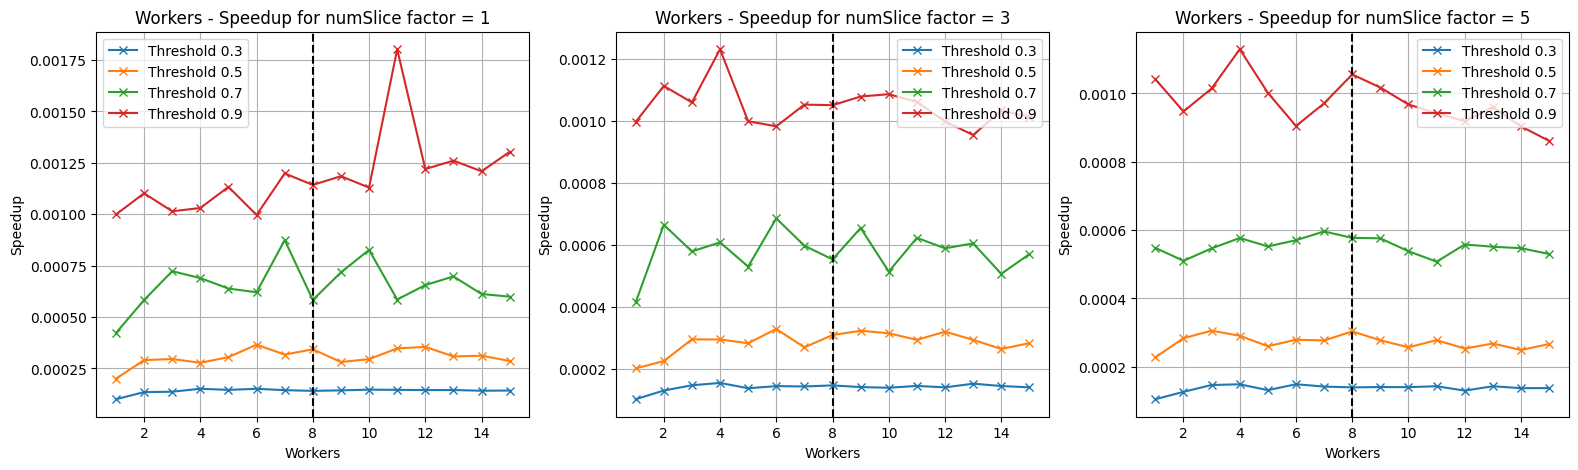

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(19, 5))

for col, (sf, df) in (zip(ax, df_speedup.items())):
  
  for th in thresholds:
    col.plot(workers, df[df['threshold'] == th]['speedup'], label=f'Threshold {th}', marker='x')   

  col.axvline(x=8, color='black', ls='--')
  col.set_xlabel('Workers')
  col.set_ylabel('Speedup')
  col.set_title(f'Workers - Speedup for numSlice factor = {sf}')
  col.xaxis.set_major_locator(MaxNLocator(integer=True))
  col.grid()
  col.legend()

plt.show()